In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [10]:
df['Classes'] = df['Classes'].str.strip()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [12]:
df['Classes'] = df['Classes'].map({'not fire':0, 'fire':1})

In [13]:
df['Classes'].unique()

array([0, 1], dtype=int64)

In [14]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [15]:
x = df.drop(['FWI'], axis=1)
y = df['FWI']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(x_train, 0.85)
corr_features

{'BUI', 'DC'}

In [19]:
corr = df.corr()

<Figure size 1200x1200 with 0 Axes>

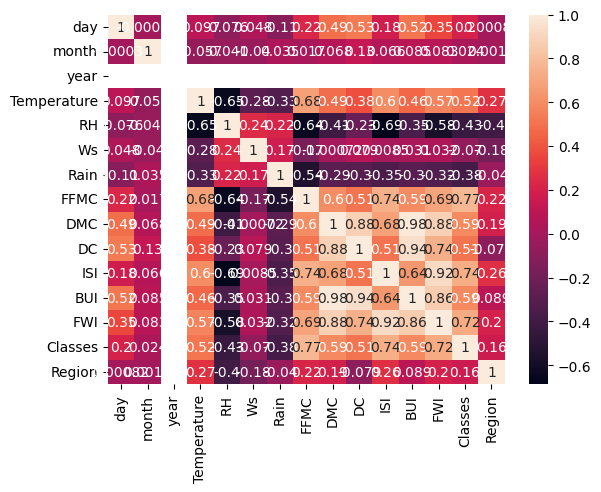

<Figure size 1200x1200 with 0 Axes>

In [20]:
sns.heatmap(corr, annot=True)
plt.figure(figsize=(12, 12))

In [21]:
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)

###### Feature Scaling


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [23]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [24]:
x_train_scaled

array([[-1.10036414,  1.3585682 ,  0.        , ..., -0.62963326,
        -1.10431526, -0.98907071],
       [ 0.47831144, -1.34865164,  0.        , ..., -0.93058524,
        -1.10431526,  1.01105006],
       [-0.53655144,  0.45616158,  0.        , ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.66417685,  1.3585682 ,  0.        , ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 1.49317432, -0.44624503,  0.        , ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.53655144,  1.3585682 ,  0.        , ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [25]:
x_test_scaled

array([[ 1.04212415e+00, -1.34865164e+00,  0.00000000e+00,
        -3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [-9.87601602e-01, -1.34865164e+00,  0.00000000e+00,
         2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.66417685e+00, -4.46245028e-01,  0.00000000e+00,
        -1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 4.78311441e-01,  1.35856820e+00,  0.00000000e+00,
         5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [ 1.15488669e+00,  1.35856820e+00,  0.0000000

In [26]:
x_train.shape, x_test.shape

((182, 12), (61, 12))

#### Model Training

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [28]:
reg.fit(x_train_scaled, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, reg.predict(x_test_scaled))

0.9837888473078155

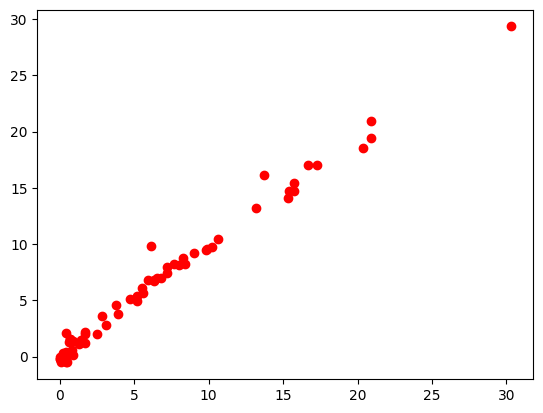

In [30]:
plt.scatter(y_test, reg.predict(x_test_scaled), color='r')

In [31]:
## Pickle the machine learning models and preprocessing models
import pickle
pickle.dump(sc, open('scaler.pkl', 'wb')) # for scaling
pickle.dump(reg, open('ridge.pkl', 'wb')) # for regressor